In [28]:
from numpy import array, linspace
from scipy.integrate import solve_ivp
from pylab import *
import pylab
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import pandas as pd
from pandas.core.internals.managers import T

In [3]:
%matplotlib inline

In [4]:
%config InlineBackend.figure_format = 'retina'

In [25]:
#Panic Cellular Automata
n = 100 # size of space: n x n
p = 0.25 # probability of initially panicky individuals

def initialize():
    global config, nextconfig, panicked
    config = zeros([n, n])
    panicked = 0
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if random() < p else 0
    nextconfig = zeros([n, n])
    return config, nextconfig

def observe():
    global config, nextconfig, panicked
    cla()
    imshow(config, vmin = 0, vmax = 1, cmap = cm.binary)

def update(config, nextconfig):
    panicked = 0
    for x in range(n):
        for y in range(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
            if config[x,y] == 1: 
                panicked = panicked+1
    
            #print("panicked", panicked)
            nextconfig[x, y] = 1 if count >= 4 else 0
    config, nextconfig = nextconfig, config
    return config, nextconfig, panicked

time = np.array(np.arange(0,500, 1))
p_values = [0.24, 0.25, 0.254, 0.255, 0.256, 0.257, 0.258, 0.259, 0.26]

panicked_numbers = []
panicked_array =[]
for p in p_values:
 
  config, nextconfig = initialize()
  for t in time:
    config, nextconfig, panicked = update(config, nextconfig)

    panicked_number = {"p": f"P{p}", "t": t, "panicked": panicked}
    panicked_numbers.append(panicked_number)
  
   

In [26]:
panicked_numbers = pd.DataFrame(panicked_numbers)
panicked_numbers.to_csv("panic_numbers_1.csv")
panicked_numbers

,p,t,panicked
0,P0.24,0,2381
1,P0.24,1,1446
2,P0.24,2,1283
3,P0.24,3,1302
4,P0.24,4,1350
...,...,...,...
85,P0.26,5,2278
86,P0.26,6,2397
87,P0.26,7,2502
88,P0.26,8,2586


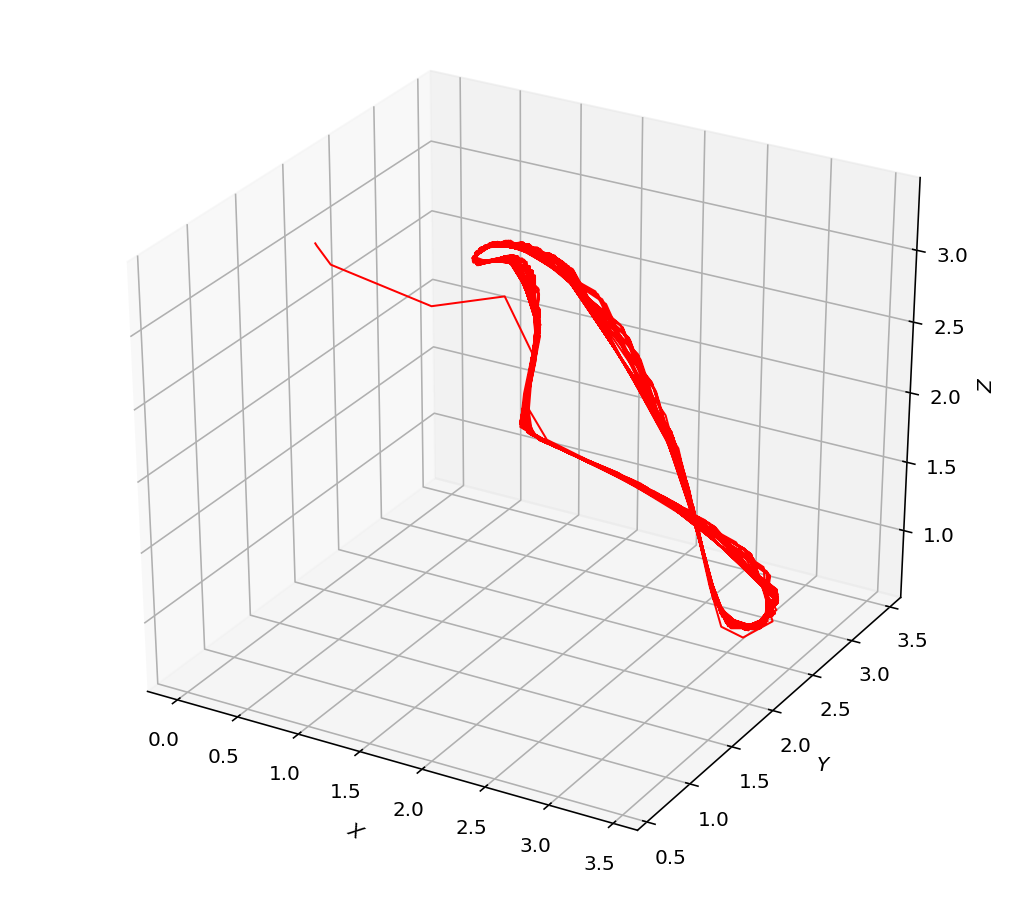

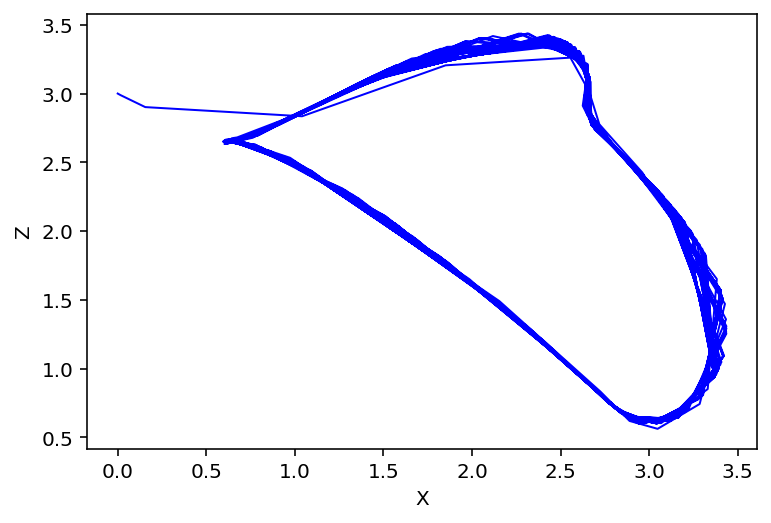

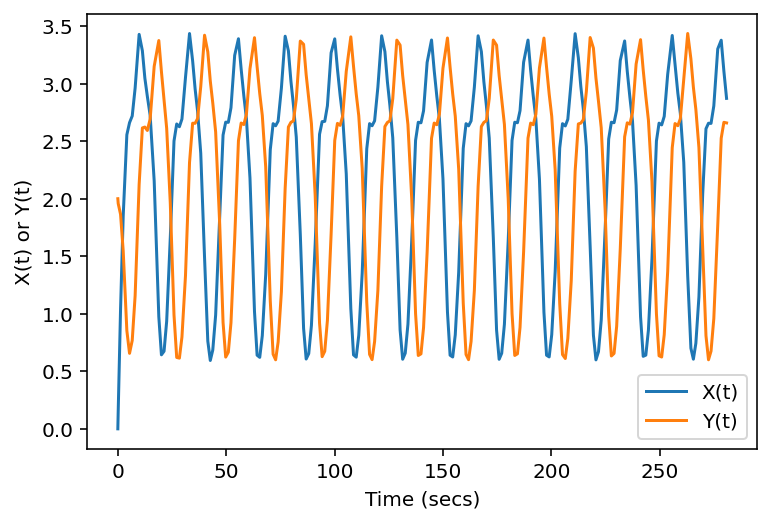

In [29]:
#Limit Cyclees and Strange Attractors
a = 0.22
def func(t, r, a):
    x, y, z = r 
    fx = -a*x + math.sin(y)
    fy = -a*y + math.sin(z)
    fz = -a*z + math.sin(x)
    return array([fx, fy, fz], float)

#starting conditions
r0 = [0, 2, 3]
#solving the equation
sol = solve_ivp(func, [0,1000], r0, t_eval=None)
#print("sol:", sol[0])
# and plot it
fig = pylab.figure()
ax = pylab.axes(projection="3d")
ax.plot3D(sol.y[0,:], sol.y[1,:], sol.y[2,:], 'red', linewidth = 1)
ax.set_xlabel('$X$', rotation=150)
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$', rotation=90)
fig.set_size_inches(9, 8)

pylab.show()

x, y, z = sol.y[0], sol.y[1], sol.y[2]

t = sol.t


fig_a, ax_a = plt.subplots()

ax_a.plot(x, z, color='blue', linewidth = 1)
ax_a.set_xlabel('X')
ax_a.set_ylabel('Z')



fig1,ax1 = plt.subplots()
ax1.plot(sol.t[0:200], x[0:200], label='X(t)')
ax1.plot(sol.t[0:200], y[0:200], label='Y(t)')
#ax1.plot(sol.t[0:400], sol.y[2, 0:400], label='Z(t)')

ax1.set_xlabel('Time (secs)')
ax1.set_ylabel('X(t) or Y(t)')
ax1.legend()

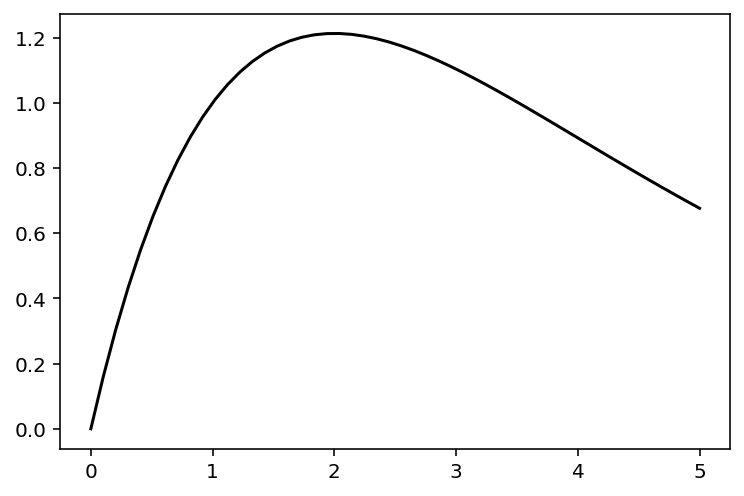

In [30]:
#One Dimentional Maps and Bifurcations
def one_d_func(r, x):
    return x*np.exp(r*(1-x))
    #return r * x * (1 - x)

x = np.linspace(0,5)
fig, ax = plt.subplots(1, 1)
ax.plot(x, one_d_func(0.5, x), 'k')

x 1.7104117834878716 	 y 0.28958821651212896
x 0.28958821651212896 	 y 1.7104117834878694
x 1.7104117834878694 	 y 0.2895882165121302
x 0.2895882165121302 	 y 1.7104117834878714
x 1.7104117834878714 	 y 0.28958821651212907
x 0.28958821651212907 	 y 1.7104117834878692
x 1.7104117834878692 	 y 0.28958821651213035
x 0.28958821651213035 	 y 1.7104117834878716
x 1.7104117834878716 	 y 0.28958821651212896
x 0.28958821651212896 	 y 1.7104117834878694
x 1.7104117834878694 	 y 0.2895882165121302
x 0.2895882165121302 	 y 1.7104117834878714
x 1.7104117834878714 	 y 0.28958821651212907
x 0.28958821651212907 	 y 1.7104117834878692
x 1.7104117834878692 	 y 0.28958821651213035
x 0.28958821651213035 	 y 1.7104117834878716
x 1.7104117834878716 	 y 0.28958821651212896
x 0.28958821651212896 	 y 1.7104117834878694
x 1.7104117834878694 	 y 0.2895882165121302


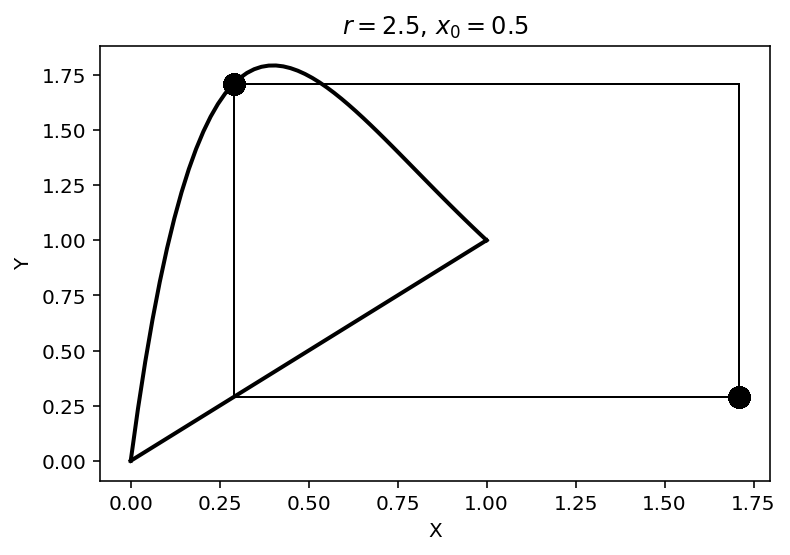

In [31]:
def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    t = np.linspace(0, 1)
    ax.plot(t, one_d_func(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    x = x0
    for i in range(n):
        y = one_d_func(r, x)
        if i > n-100: # allows to plot only the last n-x values
        # Plot the two lines.
          ax.plot([x, x], [x, y], 'k', lw=1)
          ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
          ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n) 
        if i > n-20:# shows last 10 values
          print("x", x, "\t", "y", y)
        x = y
        
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig ,ax1 = plt.subplots()
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
#ax1.set_title("lamda = 2.68 & x_0 = 0.5")
plot_system(2.5, 0.5, 1000, ax=ax1)
#plot_system(3.4, 0.5, 10, ax=ax2)

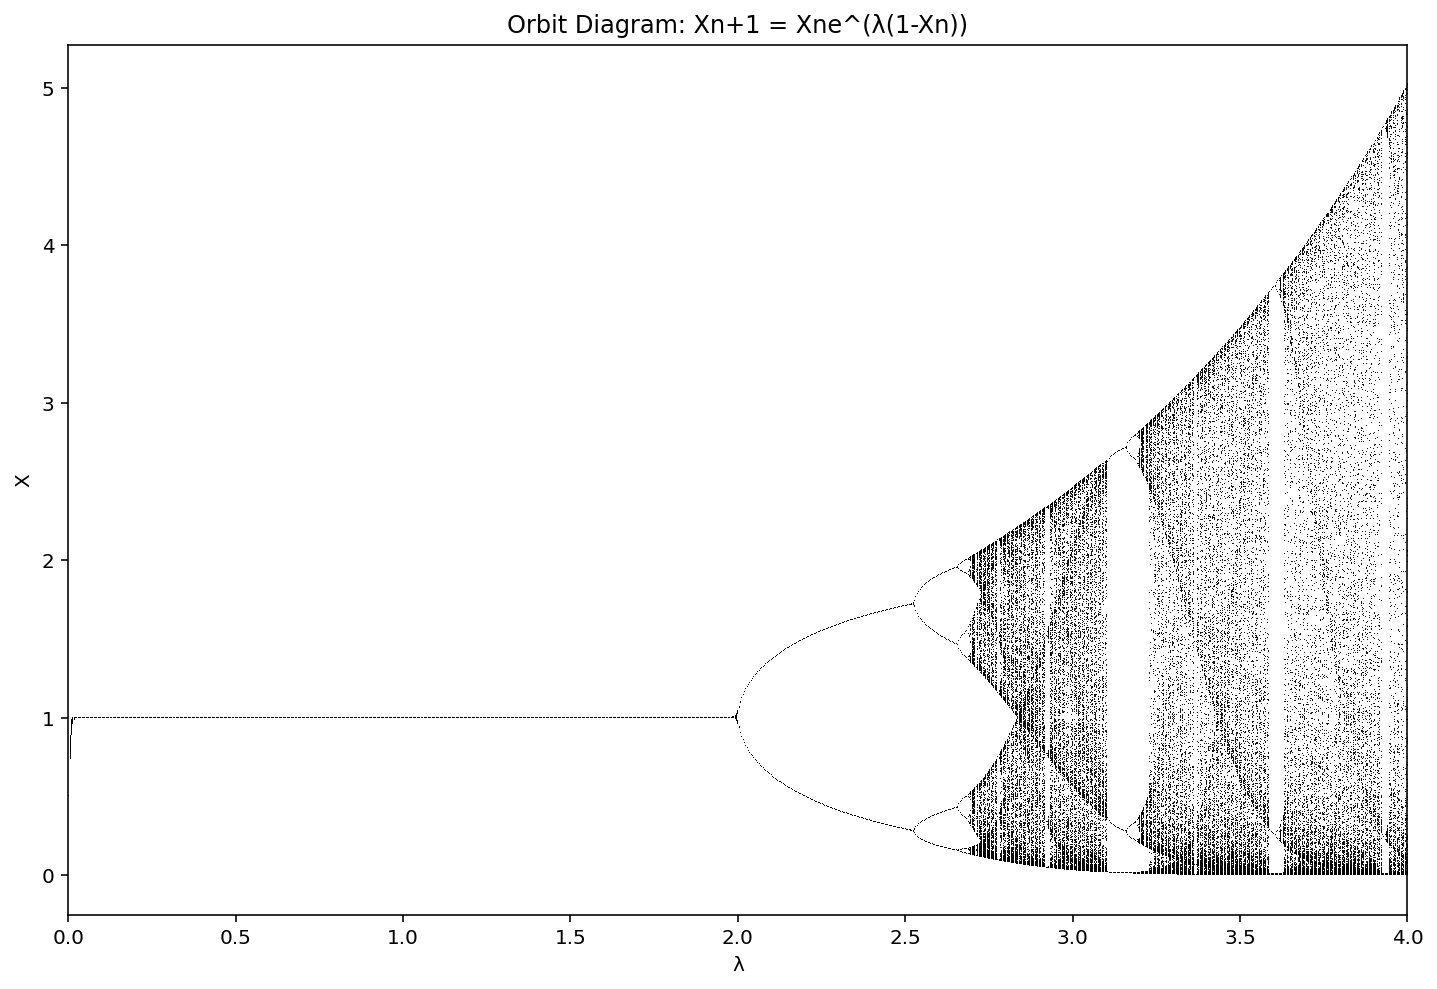

In [33]:
n = 1000
r = np.linspace(0, 4.0, n)
iterations = 512
last = 256

fig ,ax1 = plt.subplots()
x = 0.5
for i in range(iterations):
    x = one_d_func(r, x)
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.9)

ax1.set_xlabel("λ")
ax1.set_ylabel("X")
ax1.set_xlim(0, 4)
#ax1.set_ylim(0, 3)
ax1.set_title("Orbit Diagram: Xn+1 = Xne^(λ(1-Xn))")
fig.set_size_inches(12, 8)


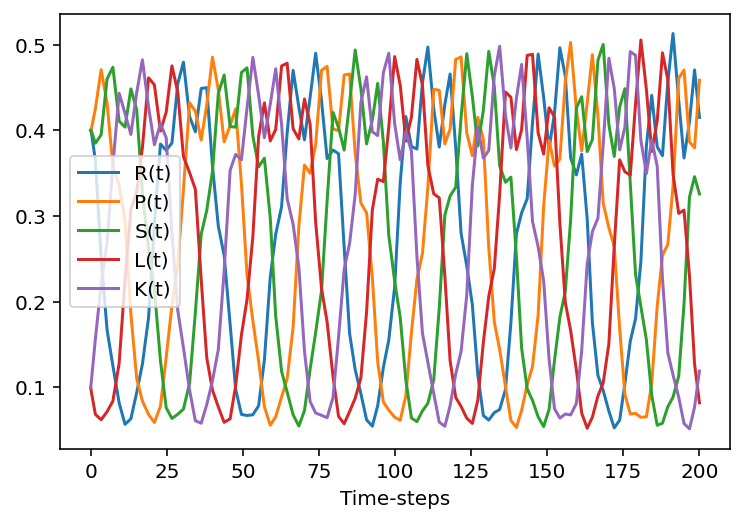

In [34]:
#Rock, paper, scissors, lizards, spock

def rock(t, x):
    r, p, s, l, k = x
    fr = r*(l+s-k-p)
    fp = p*(r+k-s-l)
    fs = s*(p+l-r-k)
    fl = l*(p+k-r-s)
    fk = k*(r+s-l-p)
    
    return array([fr, fp, fs, fl, fk], float)
# and I run it
#x0 = [91/100, 1/25, 3/100, 1/50, 0]
#x0 = [1/2, 0, 49/100, 0, 1/1000]
x0 = [10/25, 10/25, 10/25, 10/100, 10/100]
sol = solve_ivp(rock, [0,200], x0)


fig1,ax1 = plt.subplots()
ax1.plot(sol.t, sol.y[0], label='R(t)')
ax1.plot(sol.t, sol.y[1], label='P(t)')
ax1.plot(sol.t, sol.y[2], label='S(t)')
ax1.plot(sol.t, sol.y[3], label='L(t)')
ax1.plot(sol.t, sol.y[4], label='K(t)')


ax1.set_xlabel('Time-steps')
#ax1.set_ylabel('X(t) or Y(t)')
#ax1.plot(sol.t, sol.y[2], label='Z')
ax1.legend()
# fig2,ax2 = plt.subplots()
# ax2.plot(sol.t, A(sol.y[0], sol.y[1]), label='A')
# ax2.plot(sol.t, B(sol.y[0], sol.y[1]), label='B')
# ax2.legend()